In [1]:
import sys
sys.path.append('..')
from Constants import Constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import seaborn
import pyperclip
import os

import scipy.stats

import seaborn as sns

In [3]:
from statsmodels.stats.anova import anova_lm

import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
pathes = glob.glob(f"{Constants.path_to_matlab_repository_folder}/csv/*_*/HRV_and_PLI.csv")
pathes.sort()
pathes

['/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/HRV_and_PLI.csv',
 

In [6]:
# 使用するデータセットは一つなので，ここでまとめて作っちゃいましょう

for i,target_phase in enumerate(Constants.target_phases):
    
    for j,path in enumerate(pathes):

        df = pd.read_csv(path,index_col=0).fillna(0)
        # column
        # row
        df = df.loc[[target_phase]] # seriesとして取り出したいときはこっち
        if j == 0 and i == 0:
            print("flow_dataset初期化")
            dataset = df
        else:
            dataset = pd.concat([dataset, df], axis=0)
        
dataset

flow_dataset初期化


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu,min_lf,min_hf,...,kubios_lf,kubios_hf,kubios_lf/hf,FpZ,FC3,FC4,FCz,O1,O2,Fp2,mean_all,mean_3ch,concentration_FC3,concentration_FC4,concentration_FCz,max_concentration_FC3,max_concentration_FC4,max_concentration_FCz,concentration_mean,max_concentration_mean,difficulty,fast,fulfillment,absorb,questionnaire_average
rest,73.633422,814.847368,39.978782,20.415642,36.764673,0.617414,0.195251,30.0,25.996395,50.238239,4102.961213,0.517462,0.322956,363.335295,206.618148,481.080971,0.429487,1051.034414,34.569305,19.658552,45.772143,30.044847,69.955153,64.357417,460.355937,...,257.0,510.0,0.500,0.470375,0.718243,0.530592,0.783054,0.352428,0.286579,0.390179,0.504493,0.677296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.00
rest,83.421173,719.241860,39.071456,16.975765,27.482735,0.433566,0.062937,24.0,19.432942,51.631492,3152.122556,0.376378,0.129337,163.546115,555.848890,216.755501,2.564405,936.150507,17.470066,59.376018,23.153916,71.944827,28.055173,338.422924,185.617190,...,591.0,219.0,2.700,0.422667,0.593262,0.690615,0.725889,0.310892,0.438972,0.430201,0.516071,0.669922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,74.830855,801.808290,45.841974,14.946048,23.308434,0.314286,0.033766,24.0,16.481548,62.703624,3246.687778,0.262848,0.129245,340.243575,915.287809,135.159492,6.771909,1390.690875,24.465795,65.815331,9.718874,87.133149,12.866851,448.749867,135.159492,...,1044.0,133.0,7.863,0.367564,0.525578,0.305216,0.487435,0.320239,0.311307,0.395218,0.387508,0.439410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,67.437130,889.717579,108.469791,18.672020,33.520247,0.604046,0.124277,78.0,23.701366,151.703423,11295.842566,0.156235,0.129563,4215.463266,4148.250048,135.783347,30.550507,8499.496661,49.596622,48.805832,1.597546,96.830479,3.169521,3906.197196,133.201562,...,3530.0,90.0,39.337,0.413260,0.519220,0.549392,0.696971,0.218319,0.247750,0.270101,0.416431,0.588528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,73.965976,811.183784,85.603446,33.864907,50.228846,0.605479,0.249315,52.0,35.509528,114.630884,12787.816947,0.309773,0.233232,8054.799197,2345.239998,1369.658598,1.712281,11769.697793,68.436755,19.926085,11.637160,63.130660,36.869340,694.846775,746.898186,...,2373.0,2504.0,0.948,0.254564,0.437716,0.493796,0.484021,0.533929,0.538550,0.234585,0.425309,0.471844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
overload,67.871602,884.022161,34.863240,15.708439,28.331372,0.519444,0.041667,20.0,20.033207,44.712569,2814.038110,0.448044,0.125341,511.000549,189.042704,189.878838,0.995596,889.922092,57.420819,21.242613,21.336569,49.889669,50.110331,132.063474,187.407128,...,149.0,191.0,0.777,0.142077,0.179835,0.204738,0.273960,0.126628,0.120716,0.227956,0.279774,0.219511,0.278569,0.065311,0.379934,0.599672,0.268157,0.598881,0.241271,0.488903,1,5.0,3.0,6.0,3.75
overload,69.419187,864.314363,52.139367,26.782749,46.957543,0.706522,0.277174,28.0,33.201355,65.283409,6809.394690,0.508573,0.125419,752.580567,322.969379,173.814090,1.858131,1249.364036,60.237092,25.850702,13.912205,65.012103,34.987897,137.844868,162.629793,...,332.0,335.0,0.991,0.299530,0.209866,0.267556,0.467623,0.137759,0.108795,0.209677,0.261999,0.315015,0.238469,0.171739,0.151192,0.432547,0.423674,0.254268,0.187133,0.370163,1,3.0,2.0,2.0,2.00
overload,82.034953,731.395556,33.234373,14.009844,24.283955,0.405345,0.020045,20.0,17.171349,43.779218,2361.686728,0.392226,0.121536,214.582765,128.063

In [7]:
mkdir_path = f"{Constants.path_to_matlab_repository_folder}/csv/analysis_results/{Constants.folder_name}"

os.system("mkdir " + mkdir_path)
os.system("mkdir " + mkdir_path + "/ANOVA")

mkdir: /Users/miyakooti/repositories/arai_MATLAB_program/csv/analysis_results/20240917_kyoto: File exists
mkdir: /Users/miyakooti/repositories/arai_MATLAB_program/csv/analysis_results/20240917_kyoto/ANOVA: File exists


256

In [8]:
target_columns = Constants.target_columns
skip_columns = ["lf_diff", "hf_diff", "lfhf_diff", "concentration_FC3", "concentration_FC4", "concentration_FCz", "concentration_mean", "difficulty", "fast", "fulfillment", "absorb", "questionnaire_average"]

bpm
            df        sum_sq     mean_sq         F    PR(>F)
state      2.0     34.179567   17.089784  0.030362  0.970114
Residual  45.0  25329.092297  562.868718       NaN       NaN
ibi
            df         sum_sq       mean_sq         F    PR(>F)
state      2.0    7992.723402   3996.361701  0.212041  0.809735
Residual  45.0  848118.322897  18847.073842       NaN       NaN
lf
            df        sum_sq        mean_sq         F    PR(>F)
state      2.0  5.448045e+05  272402.253249  2.327366  0.109186
Residual  45.0  5.266942e+06  117043.156436       NaN       NaN
hf
            df        sum_sq        mean_sq         F    PR(>F)
state      2.0  8.019988e+05  400999.424615  1.365554  0.265612
Residual  45.0  1.321440e+07  293653.336794       NaN       NaN
min_lf
            df        sum_sq        mean_sq         F    PR(>F)
state      2.0  4.907110e+05  245355.493366  2.577959  0.087103
Residual  45.0  4.282844e+06   95174.307994       NaN       NaN
min_hf
            df       

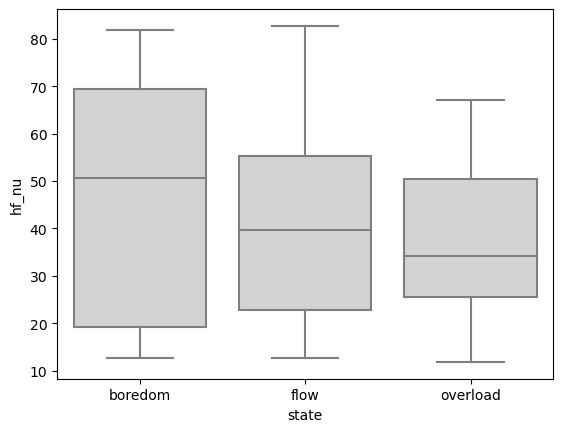

In [9]:

for target in target_columns:
    print(target)
    
    # スラッシュ変な挙動起こす
    if target == "lf/hf":
        continue
        
    if target == "kubios_lf/hf":
        continue        
    if target == "sd1/sd2":
        continue
    
    rest = dataset[[target]].loc["rest"]
    rest.reset_index(drop=True, inplace=True)

    boredom = dataset[[target]].loc["boredom"]
    boredom.reset_index(drop=True, inplace=True)

    flow = dataset[[target]].loc["flow"]
    flow.reset_index(drop=True, inplace=True)

    ultra = dataset[[target]].loc["ultra"]
    ultra.reset_index(drop=True, inplace=True)

    overload = dataset[[target]].loc["overload"]
    overload.reset_index(drop=True, inplace=True)
    
#     if target in skip_columns:
#         # restで計算されない指標である場合
#         combined_data = pd.concat([
#             boredom.assign(state='boredom'),
#             flow.assign(state='flow'),
#             ultra.assign(state='ultra'),
#             overload.assign(state='overload')
#         ])
        
#     else:
#         combined_data = pd.concat([
#             rest.assign(state='rest'),
#             boredom.assign(state='boredom'),
#             flow.assign(state='flow'),
# #             ultra.assign(state='ultra'),
#             overload.assign(state='overload')
#         ])
        
    combined_data = pd.concat([
        boredom.assign(state='boredom'),
        flow.assign(state='flow'),
#         ultra.assign(state='ultra'),
        overload.assign(state='overload')
    ])
    
    colors = {'boredom': 'lightgray', 'flow': 'lightgray', 'overload': 'lightgray'}

    
    plt.clf()
    boxplot = sns.boxplot(x="state", y=f"{target}", data=combined_data, palette=colors)
    boxplot
    
    figure = boxplot.get_figure()
    if target == "lf/hf":
        figure.savefig(mkdir_path+f"/ANOVA/lf_hf.png")
    else:
        figure.savefig(mkdir_path+f"/ANOVA/{target}.png")
        
        # 一次元配置の分散分析モデルを作成
    model = ols(f'{target} ~ state', data=combined_data).fit()

    # 分散分析結果を取得
    anova_result = anova_lm(model)

    # 結果を表示
    print(anova_result)
    
    # 事後検定の実施
    tukey = pairwise_tukeyhsd(endog=combined_data[target], groups=combined_data['state'], alpha=0.10)
    tukey.summary()

    
    # Save the string to a text file
    file_path = mkdir_path+f"/ANOVA/{target}.txt"
    with open(file_path, 'w') as file:
        file.write(tukey.summary().as_text())

<AxesSubplot:xlabel='state', ylabel='hf_nu'>

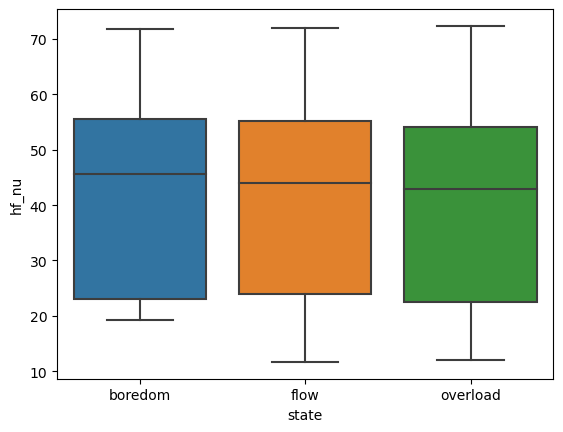

In [29]:
plt.clf()
boxplot = sns.boxplot(x="state", y=f"{target}", data=combined_data)
boxplot